### Breast Cancer Prediction using Naive Bayes Classifier
#### Author: Rajendran Kaviya

The breast cancer dataset is downloaded from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(Prognostic). We aim to predict the probability that a patient has cancer based on several indicative medical features. A Naive Bayes binary classifier model is used for this task. The dataset has class imbalance, which is typical of many medical datasets. A version of the SMOTE resampling technique is used to tackle the class imbalance and the classification performance is shown to improve drastically.

In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

#### Load dataset, display and clean

In [5]:
# load dataset
data = pd.read_csv("data/wpbc.data",header=None)
data.head()
# column 1 is the class output, the rest are all features

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [6]:
# clean dataset

# remove col 2 (time to recurrence) feature and col 0 (Patient ID)
data = data.drop(columns=[0,2],axis=1)

# move class column to the last position and reset column names
df = data.pop(1)
keys = np.arange(3,35,1)
values = np.arange(0,33,1)
dictionary = dict(zip(keys, values))
data = data.rename(columns=dictionary)
data['class'] = df
data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,class
0,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,...,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5,N
1,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2,N
2,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,...,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0,N
3,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0,N
4,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0,R


### Create training and test set

In [7]:
# store first 130 non-recurrent cases (N), first 37 recurrent cases (R) and datapoint #197 to train dataset
train_set = data[data["class"]=="N"].head(130).append(data[data["class"]=="R"].head(37)).append(data.iloc[[196]])

# store rest of the datapoints as test set
test_set = pd.concat([data, train_set, train_set]).drop_duplicates(keep=False)

### Replace missing lymph node values with median

In [8]:
# remove missing values "?" in col 34 and calculate median
median_val = train_set[train_set[31]!="?"].median(axis=0).iloc[-1]
print("The median of the lymph node feature is " + str(median_val) + ".")

# replace missing values with calculated median value
train_set = train_set.replace({31: {"?": int(median_val)}})

The median of the lymph node feature is 1.0.


### Train Naive Bayes Classifier model

In [9]:
# seperate X and y values in train set
X_train = np.array(train_set.drop(["class"],axis=1))
y_train = np.array(train_set["class"])

# seperate X and y values in test set
X_test = np.array(test_set.drop(["class"],axis=1))
y_test = np.array(test_set["class"])

In [10]:
# init Naive Bayes classfier
gnb = GaussianNB()

# train classifier and get predicted values for both train and test sets
y_pred_train = gnb.fit(X_train, y_train).predict(X_train).astype('str')
y_pred_test = gnb.predict(X_test).astype('str')

### Calculate Confusion matrix

In [11]:
train_tn, train_fp, train_fn, train_tp = metrics.confusion_matrix(y_train, y_pred_train).ravel()
arrays = [np.array(["Pred", "Pred", "Pred"]),np.array(["R", "N", "Total"])]
conf_train = pd.DataFrame([[train_tp, train_fp, train_tp+train_fp],[train_fn,train_tn, train_fn+train_tn],[train_tp+train_fn, train_fp+train_tn, train_tp+train_fn+train_fp+train_tn]],index=arrays)
columns = [('True','R'),('True','N'),('True','Total')]
conf_train.columns = pd.MultiIndex.from_tuples(columns)
print('For TRAIN dataset:')
conf_train
# R is Recurrent, N is non-recurrent

For TRAIN dataset:


True           
              R    N Total
Pred R       18   32    50
     N       20   98   118
     Total   38  130   168

In [12]:
test_tn, test_fp, test_fn, test_tp = metrics.confusion_matrix(y_test,y_pred_test).ravel()
arrays = [np.array(["Pred", "Pred", "Pred"]),np.array(["R", "N", "Total"])]
conf_test = pd.DataFrame([[test_tp, test_fp, test_tp+test_fp],[test_fn,test_tn, test_fn+test_tn],[test_tp+test_fn, test_fp+test_tn, test_tp+test_fn+test_fp+test_tn]],index=arrays)
columns = [('True','R'),('True','N'),('True','Total')]
conf_test.columns = pd.MultiIndex.from_tuples(columns)
print('For TEST dataset:')
conf_test
# R is Recurrent, N is non-recurrent

For TEST dataset:


True          
              R   N Total
Pred R        3   7    10
     N        6  14    20
     Total    9  21    30

### Calculate ROC and AUC

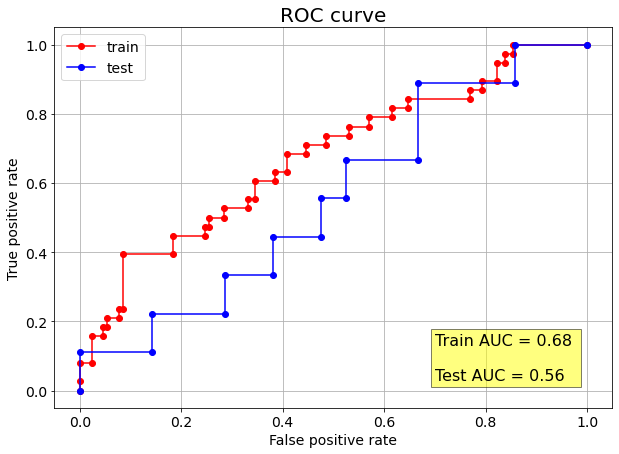

In [13]:
# note that 'N' is negative class (no cancer), 'R' is positive class (cancer)

# for TRAIN set
y_score_train = gnb.predict_proba(X_train)[0::,1] # extract the probability estimates for the positive class
[train_fpr, train_tpr, thres] = metrics.roc_curve(y_train, y_score_train, pos_label = "R") # get roc variables

# for TEST set
y_score_test = gnb.predict_proba(X_test)[0::,1] # extract the probability estimates for the positive class
[test_fpr, test_tpr, thres] = metrics.roc_curve(y_test, y_score_test, pos_label = "R") # get roc variables

# calculate AUCs
auc_test = metrics.roc_auc_score(y_test, y_score_test)
auc_train = metrics.roc_auc_score(y_train, y_score_train)

# plot ROC curves
plt.figure(figsize=[10,7])
plt.grid()
plt.plot(train_fpr, train_tpr, 'ro-')
plt.plot(test_fpr, test_tpr, 'bo-')
plt.legend(["train","test"],fontsize=14)
plt.xlabel('False positive rate',fontsize=14)
plt.ylabel('True positive rate',fontsize=14)
plt.title('ROC curve',fontsize=20)
plt.text(0.70, 0.03,'Train AUC = %.2f \n\nTest AUC = %.2f'%(auc_train,auc_test),bbox=dict(facecolor='yellow', alpha=0.5), fontsize=16)
plt.tick_params(labelsize=14)

### Calculate Accuracy, Precision, Recall and F1-score

In [14]:
train_precision = metrics.precision_score(y_train, y_pred_train, pos_label="R")
test_precision = metrics.precision_score(y_test, y_pred_test, pos_label="R")

train_recall = metrics.recall_score(y_train, y_pred_train, pos_label="R")
test_recall = metrics.recall_score(y_test, y_pred_test, pos_label="R")

train_f1 = metrics.f1_score(y_train, y_pred_train, pos_label="R")
test_f1 = metrics.f1_score(y_test, y_pred_test, pos_label="R")

train_accuracy = gnb.score(X_train,y_train)
test_accuracy = gnb.score(X_test,y_test)

scores = pd.DataFrame([[train_accuracy,test_accuracy],[train_precision,test_precision],[train_recall,test_recall],[train_f1,test_f1]],columns=["Train","Test"]).rename(index={0:'Accuracy', 1: 'Precison', 2: 'Recall', 3: 'F1-score'})
scores.round(decimals=2)

,Train,Test
Accuracy,0.69,0.57
Precison,0.36,0.30
Recall,0.47,0.33
F1-score,0.41,0.32


### Comments on results

This is a medical dataset, which often tends to be imbalanced, i.e., there are fewer cancer cases than non-cancer cases. Therefore, the F1-score is a better indicator of performance than accuracy. We see that the F1-score is poor for both train and test datasets, which is mainly due to the class imbalance in the dataset.

This can be fixed by applying the SMOTE resampling technique. This technique mainly aims to create artificial data samples that are similar to the data samples in the minority class, and drop some data samples from the majority class, in an effort to equalize the number of data samples in each class. The actual method used for this task can vary. In this code, I use KNN for upsampling the data samples in the minority class and randomly drop some data samples from the majority class.

### Apply SMOTE

In [15]:
original_N_class = train_set[train_set["class"]=="N"]
original_R_class = train_set[train_set["class"]=="R"]

#### downsampling

SMOTE_N_class = original_N_class.sample(n=90, random_state=1).drop(["class"],axis=1) # randomly select 90 samples from common class


#### upsampling

# KNN for SMOTE
K = 5 
neigh = NearestNeighbors(n_neighbors=K)
neigh.fit(original_R_class.drop(["class"],axis=1)) # use only uncommon class datapts, so it returns neighbors from uncommon class

num_upsamples = 90-len(original_R_class) # no. of new samples needed = 52
selected_points = original_R_class.sample(n=num_upsamples, random_state=4, replace=True) # randomly select 52 pts w replacement
neighbours = X_train[neigh.kneighbors(selected_points.drop(["class"],axis=1), K, return_distance=False)].astype('float32')
print(neighbours.shape) # 52 points, each with 5 neighbours, each with 32 features


np.random.seed(seed=34) # for reproducible results


# take random combi of neighbours for each of the 52 points and store in synthetic_data
synthetic_data = []
for i in range(0,52,1):
    weights = np.random.uniform(low=0,high=1,size=(1,K)) # random uniform [0,1] weights
    synthetic_point = np.dot(weights,neighbours[i,:,:])/np.sum(weights) # random combi of neighbours
    synthetic_data.append(synthetic_point) # store

synthetic_data = pd.DataFrame(np.array(synthetic_data).reshape(num_upsamples,32)) # make into dataframe
synthetic_data = synthetic_data.round({31: 0}) # make number of positive axillary lymph nodes integers

# append synth data to get SMOTE R dataset
SMOTE_R_class = pd.concat([original_R_class.drop(["class"],axis=1),synthetic_data]).astype('float32')

# add class labels and seperate into X and y values
SMOTE_R_class.insert(32,"class",["R"]*90)
SMOTE_N_class.insert(32,"class",["N"]*90)
SMOTE_train = SMOTE_R_class.append(SMOTE_N_class)
X_SMOTE_train = SMOTE_train.drop(["class"],axis=1)
y_SMOTE_train = SMOTE_train["class"]

(52, 5, 32)


In [16]:
# init Naive Bayes classfier
gnb = GaussianNB()

# train classifier and get predicted values for both train and test sets
y_pred_train = gnb.fit(X_SMOTE_train, y_SMOTE_train).predict(X_SMOTE_train).astype('str')
y_pred_test = gnb.predict(X_test).astype('str')

### Calculate Confusion Matrix

In [17]:
train_tn, train_fp, train_fn, train_tp = metrics.confusion_matrix(y_SMOTE_train, y_pred_train).ravel()
arrays = [np.array(["Pred", "Pred", "Pred"]),np.array(["R", "N", "Total"])]
conf_train = pd.DataFrame([[train_tp, train_fp, train_tp+train_fp],[train_fn,train_tn, train_fn+train_tn],[train_tp+train_fn, train_fp+train_tn, train_tp+train_fn+train_fp+train_tn]],index=arrays)
columns = [('True','R'),('True','N'),('True','Total')]
conf_train.columns = pd.MultiIndex.from_tuples(columns)
print('For TRAIN dataset:')
conf_train
# R is Recurrent, N is non-recurrent

For TRAIN dataset:


True          
              R   N Total
Pred R       73  45   118
     N       17  45    62
     Total   90  90   180

In [18]:
test_tn, test_fp, test_fn, test_tp = metrics.confusion_matrix(y_test,y_pred_test).ravel()
arrays = [np.array(["Pred", "Pred", "Pred"]),np.array(["R", "N", "Total"])]
conf_test = pd.DataFrame([[test_tp, test_fp, test_tp+test_fp],[test_fn,test_tn, test_fn+test_tn],[test_tp+test_fn, test_fp+test_tn, test_tp+test_fn+test_fp+test_tn]],index=arrays)
columns = [('True','R'),('True','N'),('True','Total')]
conf_test.columns = pd.MultiIndex.from_tuples(columns)
print('For TEST dataset:')
conf_test
# R is Recurrent, N is non-recurrent

For TEST dataset:


True          
              R   N Total
Pred R        6   5    11
     N        3  16    19
     Total    9  21    30

### Calculate ROC and AUC

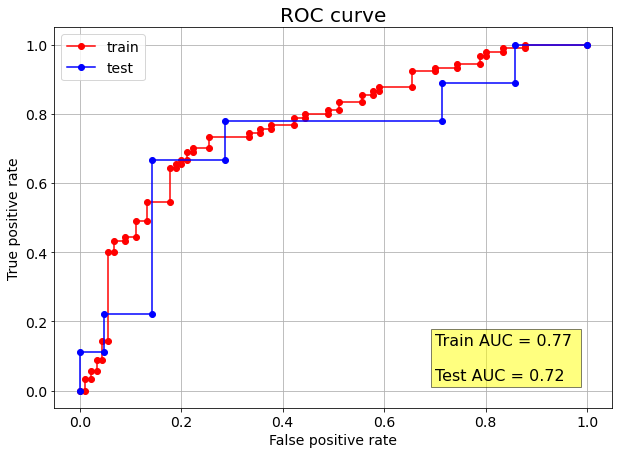

In [19]:
# note that 'N' is negative class (no cancer), 'R' is positive class (cancer)

# for TRAIN set
y_score_train = gnb.predict_proba(X_SMOTE_train)[0::,1] # extract the probability estimates for the positive class
[train_fpr, train_tpr, thres] = metrics.roc_curve(y_SMOTE_train, y_score_train, pos_label = "R") # get roc variables

# for TEST set
y_score_test = gnb.predict_proba(X_test)[0::,1] # extract the probability estimates for the positive class
[test_fpr, test_tpr, thres] = metrics.roc_curve(y_test, y_score_test, pos_label = "R") # get roc variables

# calculate AUCs
auc_test = metrics.roc_auc_score(y_test, y_score_test)
auc_train = metrics.roc_auc_score(y_SMOTE_train, y_score_train)

# plot ROC curves
plt.figure(figsize=[10,7])
plt.grid()
plt.plot(train_fpr, train_tpr, 'ro-')
plt.plot(test_fpr, test_tpr, 'bo-')
plt.legend(["train","test"],fontsize=14)
plt.xlabel('False positive rate',fontsize=14)
plt.ylabel('True positive rate',fontsize=14)
plt.title('ROC curve',fontsize=20)
plt.text(0.70, 0.03,'Train AUC = %.2f \n\nTest AUC = %.2f'%(auc_train,auc_test),bbox=dict(facecolor='yellow', alpha=0.5), fontsize=16)
plt.tick_params(labelsize=14)

### Calculate Accuracy, Precision, Recall and F1 score

In [20]:
train_precision = metrics.precision_score(y_SMOTE_train, y_pred_train, pos_label="R")
test_precision = metrics.precision_score(y_test, y_pred_test, pos_label="R")

train_recall = metrics.recall_score(y_SMOTE_train, y_pred_train, pos_label="R")
test_recall = metrics.recall_score(y_test, y_pred_test, pos_label="R")

train_f1 = metrics.f1_score(y_SMOTE_train, y_pred_train, pos_label="R")
test_f1 = metrics.f1_score(y_test, y_pred_test, pos_label="R")

train_accuracy = gnb.score(X_SMOTE_train,y_SMOTE_train)
test_accuracy = gnb.score(X_test,y_test)

scores = pd.DataFrame([[train_accuracy,test_accuracy],[train_precision,test_precision],[train_recall,test_recall],[train_f1,test_f1]],columns=["Train","Test"]).rename(index={0:'Accuracy', 1: 'Precison', 2: 'Recall', 3: 'F1-score'})
scores.round(decimals=2)

,Train,Test
Accuracy,0.66,0.73
Precison,0.62,0.55
Recall,0.81,0.67
F1-score,0.70,0.60


### Does SMOTE help?

Yes, SMOTE does help in this case. We notice that the F1 scores have improved for both the train and test dataset. 

We notice that the recall scores show a huge improvement after SMOTE, in both train and test datasets. Since this is a medical dataset, it is more important to identify as many recurrent cases as possible. This is so that the patient can be notified early and the necessary precautions/treatments can be taken. With this in mind, it is okay to err on the side of caution and wrongly identify cases as recurrent when they aren't actually recurrent. So recall is more important than precision, so SMOTE did help us achieve our goal more effectively.

The test ROC curve has moved closer to the top left corner after SMOTE. The test ROC curve is comparable with the train ROC curve after SMOTE, which suggests increased generalizaing ability of the classifier after SMOTE.